# RealClearPolitics Analysis
---

This is an analysis of the news and politics aggregator [RealClearPolitics](https://www.realclearpolitics.com). The data was scraped from the site using Scrapy. The code for this project is available [here](https://github.com/bvacek/web_scraping/tree/master/RCP)

### Scrapy
---------

[Scrapy](https://scrapy.org/) is an open source text scraping app. It is written in Python.

My scrapy spider starts with the most current page of realclearpolitics, downloads the **date**, **title**, **source**, **author**, and **link** of each article and exports and yields them as rows for a .csv file. It then follows the link to the previous day's page and repeats the process. 

I currently have the spider set to run until the date reads <b>12/31/2017</b> which returns **9335** articles but this can be easily changed if you desire more or less data.


### The Analysis
------
The analysis side is done using the following packages:

* [Pandas:](https://pandas.pydata.org) a package for data manipulation. I used it for its DataFrame data structure.

* [NumPy:](https://www.numpy.org) a package for large, multidimensional arrays. Pandas is dependent on it.

* [MatPlotLib:](https://matplotlib.org) a package for basic data visualization.

* [Plotly:](https://plot.ly) a package for more advanced data visualization.

* [Newspaper:](https://newspaper.readthedocs.io/en/latest/) a package for natural language processing of news articles

* [NLTK (Natural Language Toolkit):](https://www.nltk.org/) one of the most widely used databases for natural language processing. Newspaper is dependent on it.

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='benvacek', api_key='hdJj4MRyb6oNYJYnG7pI')
from newspaper import Article
import nltk
import warnings
warnings.filterwarnings('ignore')


Reads data into a DataFrame and prints the first 4 and last 4 rows.

As you can see the data contains **date**, **title**, **source** (the publication the article was taken from), **author**, **link**.

In [119]:
rcp_df = pd.read_csv('rcp.csv')
rcp_df.iloc[np.r_[0:4, -4:0]]

,date,title,source,author,link
0,2018/12/11,"Republicans, Don't Break Our Democracy",CNN,Tom Perez,https://www.realclearpolitics.com/2018/12/11/r...
1,2018/12/11,Build the Wall--Do What We Said We'd Do,FOX News,Reps. Jordan,https://www.realclearpolitics.com/2018/12/11/b...
2,2018/12/11,Why Democrats Need Nancy Pelosi as Speaker,USA Today,Jill Lawrence,https://www.realclearpolitics.com/2018/12/11/w...
3,2018/12/11,Will the Leakers in the Flynn Case Escape Just...,American Greatness,Julie Kelly,https://www.realclearpolitics.com/2018/12/11/w...
9331,2018/01/02,"This Moment Is About Iran, Not About Trump",CNN,Aaron David Miller,https://www.realclearpolitics.com/2018/01/02/t...
9332,2018/01/02,Congress's Gift to Blue-State Taxpayers,Wall Street Journal,Alfredo Ortiz,https://www.realclearpolitics.com/2018/01/02/c...
9333,2018/01/02,Hope It'll Be a Better Year for Immigrants Aft...,NYDN,Allan Wernick,https://www.realclearpolitics.com/2018/01/02/h...
9334,2018/01/02,From Detroit to Selma: Viola Liuzzo's Sacrifice,RealClearPolitics,Carl Cannon,https://www.realclearpolitics.com/2018/01/02/f...


---

### First Graph
The first graph simply shows the 10 most common sources that RCP takes from along with the percentage of all posts that each source represents.

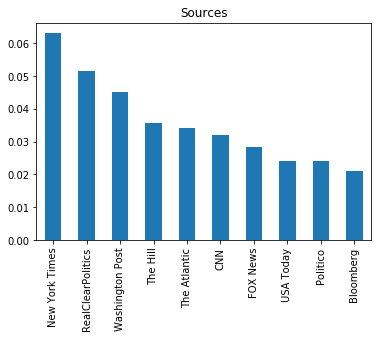

In [120]:
rcp_df['source'].value_counts(normalize=True).head(10).plot.bar()
plt.title('Sources')
plt.show()

---

exported the top 10 sources to a list

In [132]:
top10sources = list(rcp_df['source'].value_counts().head(10).keys())
top10sources

['New York Times',
 'RealClearPolitics',
 'Washington Post',
 'The Hill',
 'The Atlantic',
 'CNN',
 'FOX News',
 'USA Today',
 'Politico',
 'Bloomberg']

---

The **date** column in the original .csv file is a string which is not very useful for analysis so I had to convert it into a series of integers.

First I made 3 new columns in the DataFrame: **month**, **day**, and **year**.

In [122]:
rcp_df.insert(1,'month',None)
rcp_df.insert(2,'day',None)
rcp_df.insert(3,'year',None)
rcp_df.head()

,date,month,day,year,title,source,author,link
0,2018/12/11,None,None,None,"Republicans, Don't Break Our Democracy",CNN,Tom Perez,https://www.realclearpolitics.com/2018/12/11/r...
1,2018/12/11,None,None,None,Build the Wall--Do What We Said We'd Do,FOX News,Reps. Jordan,https://www.realclearpolitics.com/2018/12/11/b...
2,2018/12/11,None,None,None,Why Democrats Need Nancy Pelosi as Speaker,USA Today,Jill Lawrence,https://www.realclearpolitics.com/2018/12/11/w...
3,2018/12/11,None,None,None,Will the Leakers in the Flynn Case Escape Just...,American Greatness,Julie Kelly,https://www.realclearpolitics.com/2018/12/11/w...
4,2018/12/11,None,None,None,What Has the President Been 'Smocking'?,Washington Post,Eugene Robinson,https://www.realclearpolitics.com/2018/12/11/w...


- - - 
I then iterated over the DataFrame and for each row converted the **date** value into three integers representing the month, day, and year of the post and saved each in its respective column.

In [123]:
for count,i in enumerate(rcp_df['date']):
    rcp_df['month'][count] = int(i.split('/')[1])
    rcp_df['day'][count] = int(i.split('/')[2])
    rcp_df['year'][count] = int(i.split('/')[0])

rcp_df.sample(10)

,date,month,day,year,title,source,author,link
8799,2018/01/22,1,22,2018,James O'Keefe Brings Back the Practice of Jour...,NY Post,Michael Goodwin,https://www.realclearpolitics.com/2018/01/22/j...
8656,2018/01/27,1,27,2018,Haley the Victim of a Classic Smear Against Po...,CNN,Frida Ghitis,https://www.realclearpolitics.com/2018/01/27/h...
6910,2018/04/01,4,1,2018,My 72-Hour Safari in Clinton Country,Politico,Adam Wren,https://www.realclearpolitics.com/2018/04/01/m...
485,2018/11/22,11,22,2018,Trump Is Crude. But He's Right About Saudi Ara...,New York Times,Doran,https://www.realclearpolitics.com/2018/11/22/t...
6169,2018/04/29,4,29,2018,'My New Life as an Accused Predator': Brokaw F...,Vanity Fair,Joe Pompeo,https://www.realclearpolitics.com/2018/04/29/0...
1275,2018/10/24,10,24,2018,The Problem With the FBI's 'Active Shooter' Data,RealClearPolitics,John Lott,https://www.realclearpolitics.com/2018/10/24/t...
5356,2018/05/28,5,28,2018,Trump's Korea Blunder Is Worse Than It Looks,Bloomberg,Albert Hunt,https://www.realclearpolitics.com/2018/05/28/t...
5587,2018/05/20,5,20,2018,President Trump Is His Own Wiretap,Los Angeles Times,Virginia Heffernan,https://www.realclearpolitics.com/2018/05/20/p...
6155,2018/04/29,4,29,2018,How a Lifelong Anti-Gun Liberal Became an NRA ...,DM Register,Ryan Moore,https://www.realclearpolitics.com/2018/04/29/h...
2763,2018/08/31,8,31,2018,Why Technology Favors Tyranny,The Atlantic,Yuval Harari,https://www.realclearpolitics.com/2018/08/31/w...


---

### Second Graph

I decided to graph the prevalence of each of the top 10 sources over the course of the year.

First I created a *dictionary* containing as its keys, each of the 10 sources and as its values, their for each month.

In [124]:
temp_df = pd.concat([rcp_df[rcp_df['source'].isin(top10sources)]['source'],
                     rcp_df[rcp_df['source'].isin(top10sources)]['month']],
                    axis = 1)
data = {}

for i in list(temp_df['source'].unique()):
    arr = []
    for j in list(temp_df['month'].unique()):
        arr.append(temp_df[(temp_df['source'] == i) & (temp_df['month'] == j)].size)
    data[i] = arr
data

{'Bloomberg': [18, 30, 26, 28, 44, 24, 32, 28, 36, 48, 30, 34],
 'CNN': [16, 42, 48, 40, 54, 50, 48, 58, 42, 68, 46, 68],
 'FOX News': [32, 60, 48, 40, 58, 58, 52, 42, 42, 28, 24, 30],
 'New York Times': [44, 80, 118, 116, 108, 88, 102, 86, 100, 88, 94, 114],
 'Politico': [10, 48, 28, 32, 24, 30, 44, 40, 42, 42, 46, 46],
 'RealClearPolitics': [28, 120, 96, 60, 94, 98, 80, 72, 66, 88, 62, 66],
 'The Atlantic': [18, 60, 58, 58, 54, 50, 54, 60, 58, 54, 48, 44],
 'The Hill': [12, 52, 60, 56, 76, 74, 52, 78, 44, 62, 44, 32],
 'USA Today': [20, 36, 44, 56, 28, 58, 36, 40, 32, 32, 22, 30],
 'Washington Post': [22, 70, 70, 74, 72, 68, 70, 78, 62, 62, 76, 88]}

---
I then created a **Plotly** *line* object for each source.

In [125]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

trace0 = go.Scatter(
    x = month,
    y = data['Bloomberg'],
    name = 'Bloomberg'
)

trace1 = go.Scatter(
    x = month,
    y = data['CNN'],
    name = 'CNN'
)

trace2 = go.Scatter(
    x = month,
    y = data['FOX News'],
    name = 'FOX News'
)

trace3 = go.Scatter(
    x = month,
    y = data['New York Times'],
    name = 'New York Times'
)

trace4 = go.Scatter(
    x = month,
    y = data['Politico'],
    name = 'Politico'
)

trace5 = go.Scatter(
    x = month,
    y = data['RealClearPolitics'],
    name = 'RealClearPolitics'
)

trace6 = go.Scatter(
    x = month,
    y = data['The Atlantic'],
    name = 'The Atlantic'
)

trace7 = go.Scatter(
    x = month,
    y = data['The Hill'],
    name = 'The Hill'
)

trace8 = go.Scatter(
    x = month,
    y = data['USA Today'],
    name = 'USA Today'
)

trace9 = go.Scatter(
    x = month,
    y = data['Washington Post'],
    name = 'Washington Post'
)

And finally I graphed each of these lines. 

Pass over them with your cursor to see how Plotly allows for interactive graphs.

In [126]:
py.iplot([trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9])

### Keywords

Using the newspaper package, I can extract keywords from an article.

In [127]:
url = rcp_df['link'][0]
article = Article(url)
article.download()
article.parse()
article.nlp()
article.keywords

['trump',
 'voters',
 'slate',
 'repudiation',
 'dont',
 'republican',
 'republicans',
 'powerful',
 'politicians',
 'midterm',
 'turning',
 'won',
 'break',
 'democracy']


Unfortunately, my machine does not have the computing power to do this for all **9335** rows in the DataFrame. Instead I will take the first 20.

In [130]:
small_df = rcp_df.head(20)
small_df.insert(8,'keywords',None)
keywords = []
for count,i in enumerate(small_df['link']):
    url = i
    article = Article(url)
    article.download()
    article.parse()
    article.nlp()
    for j in article.keywords:
        keywords.append(j)
    small_df['keywords'][count] = article.keywords
small_df.head(5)

,date,month,day,year,title,source,author,link,keywords
0,2018/12/11,12,11,2018,"Republicans, Don't Break Our Democracy",CNN,Tom Perez,https://www.realclearpolitics.com/2018/12/11/r...,"[trump, voters, slate, repudiation, dont, repu..."
1,2018/12/11,12,11,2018,Build the Wall--Do What We Said We'd Do,FOX News,Reps. Jordan,https://www.realclearpolitics.com/2018/12/11/b...,"[building, deliver, build, dowe, help, weeks, ..."
2,2018/12/11,12,11,2018,Why Democrats Need Nancy Pelosi as Speaker,USA Today,Jill Lawrence,https://www.realclearpolitics.com/2018/12/11/w...,"[presidential, pelosi, happens, elections, amo..."
3,2018/12/11,12,11,2018,Will the Leakers in the Flynn Case Escape Just...,American Greatness,Julie Kelly,https://www.realclearpolitics.com/2018/12/11/w...,"[case, reminded, trusted, trumps, recommended,..."
4,2018/12/11,12,11,2018,What Has the President Been 'Smocking'?,Washington Post,Eugene Robinson,https://www.realclearpolitics.com/2018/12/11/w...,"[trump, proves, meant, smoking, tweeting, wron..."


---

### Third Graph

It's hard to make a meaningful analysis of such a small body of data but I can show the top 10 most common keywords and their frequencies. 

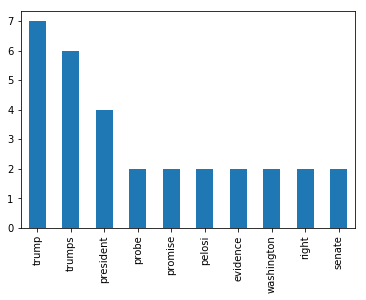

In [129]:
keyword_df = pd.Series(keywords)
keyword_df.value_counts().head(10).plot.bar()
plt.show()